In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [2]:
# California housing dataset
from sklearn.datasets import  fetch_california_housing

In [4]:
data = fetch_california_housing()

In [5]:
X = data.data  # Feature matrix
y = data.target  # Target vector
feature_name = data.feature_names

In [6]:
df = pd.DataFrame(X,columns = feature_name)
df['target'] = y

In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
df['AveRooms'] = df['AveRooms'].round()
df['AveOccup'] = df['AveOccup']. round()

In [9]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,7.0,1.023810,322.0,3.0,37.88,-122.23,4.526
1,8.3014,21.0,6.0,0.971880,2401.0,2.0,37.86,-122.22,3.585
2,7.2574,52.0,8.0,1.073446,496.0,3.0,37.85,-122.24,3.521
3,5.6431,52.0,6.0,1.073059,558.0,3.0,37.85,-122.25,3.413
4,3.8462,52.0,6.0,1.081081,565.0,2.0,37.85,-122.25,3.422


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
df.shape

(20640, 9)

In [12]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [13]:
df.duplicated().sum()

0

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.53480,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.00000,37.000000,52.000000
AveRooms,20640.0,5.424806,2.491940,1.000000,4.000000,5.00000,6.000000,142.000000
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.04878,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.00000,1725.000000,35682.000000
AveOccup,20640.0,3.075727,10.387242,1.000000,2.000000,3.00000,3.000000,1243.000000
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.26000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.49000,-118.010000,-114.310000
target,20640.0,2.068558,1.153956,0.149990,1.196000,1.79700,2.647250,5.000010


In [15]:
dfc = df.copy()

In [16]:
dfc.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,7.0,1.023810,322.0,3.0,37.88,-122.23,4.526
1,8.3014,21.0,6.0,0.971880,2401.0,2.0,37.86,-122.22,3.585
2,7.2574,52.0,8.0,1.073446,496.0,3.0,37.85,-122.24,3.521
3,5.6431,52.0,6.0,1.073059,558.0,3.0,37.85,-122.25,3.413
4,3.8462,52.0,6.0,1.081081,565.0,2.0,37.85,-122.25,3.422


In [17]:
dfc.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [18]:
dfc.duplicated().sum()

0

In [19]:
dfc.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,7.0,1.023810,322.0,3.0,37.88,-122.23,4.526
1,8.3014,21.0,6.0,0.971880,2401.0,2.0,37.86,-122.22,3.585
2,7.2574,52.0,8.0,1.073446,496.0,3.0,37.85,-122.24,3.521
3,5.6431,52.0,6.0,1.073059,558.0,3.0,37.85,-122.25,3.413
4,3.8462,52.0,6.0,1.081081,565.0,2.0,37.85,-122.25,3.422


In [20]:
dfc.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [21]:
dfc.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.53480,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.00000,37.000000,52.000000
AveRooms,20640.0,5.424806,2.491940,1.000000,4.000000,5.00000,6.000000,142.000000
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.04878,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.00000,1725.000000,35682.000000
AveOccup,20640.0,3.075727,10.387242,1.000000,2.000000,3.00000,3.000000,1243.000000
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.26000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.49000,-118.010000,-114.310000
target,20640.0,2.068558,1.153956,0.149990,1.196000,1.79700,2.647250,5.000010


In [22]:
# Removing Outliers
# collecting numerical cols together
num_columns = dfc.select_dtypes(include='number')
print(num_columns.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')


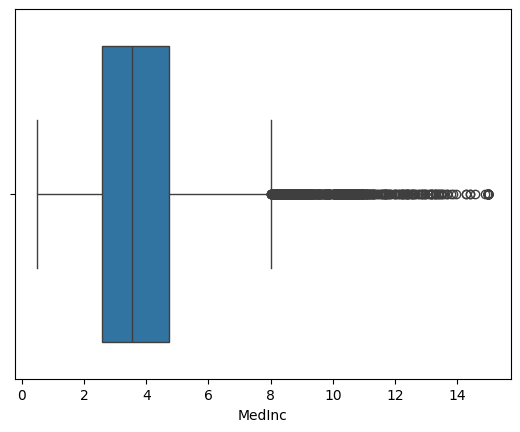

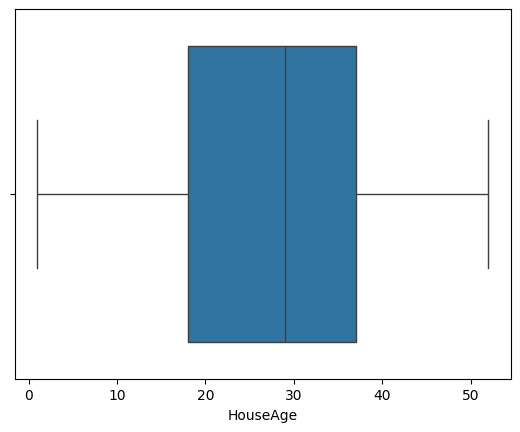

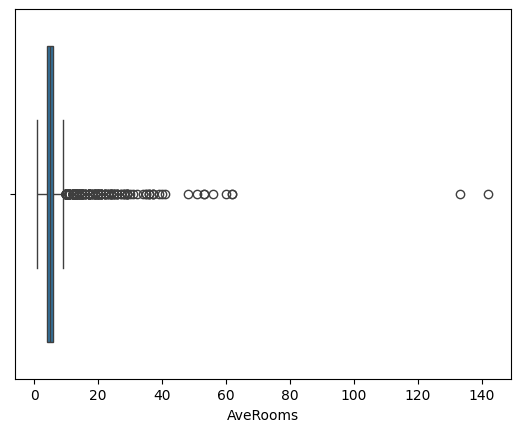

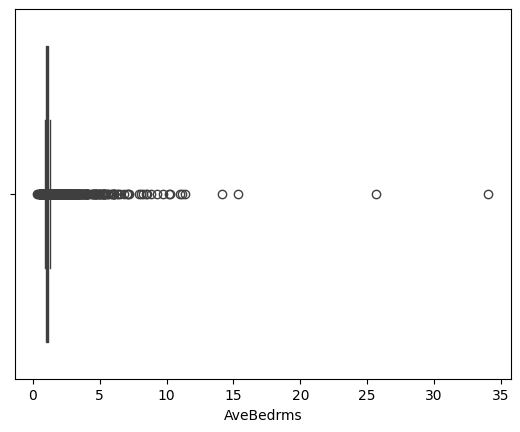

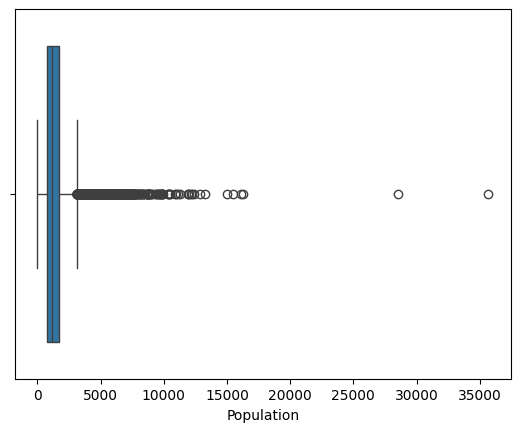

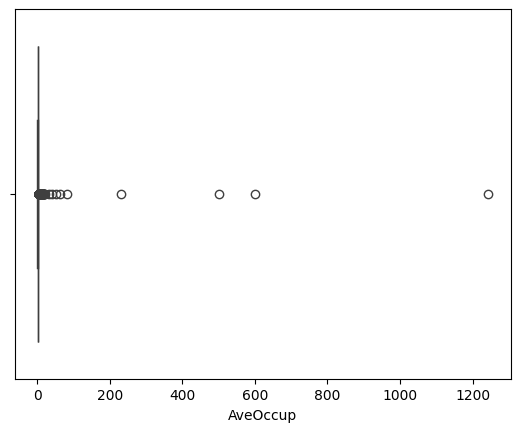

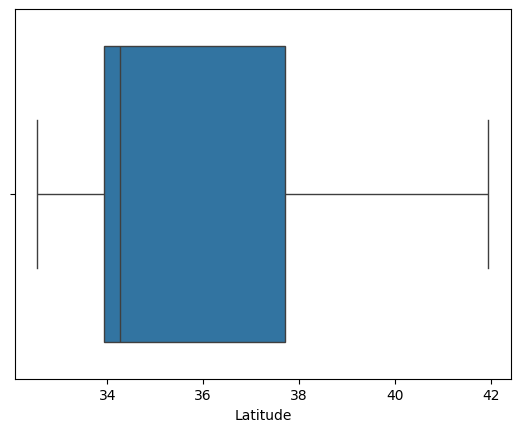

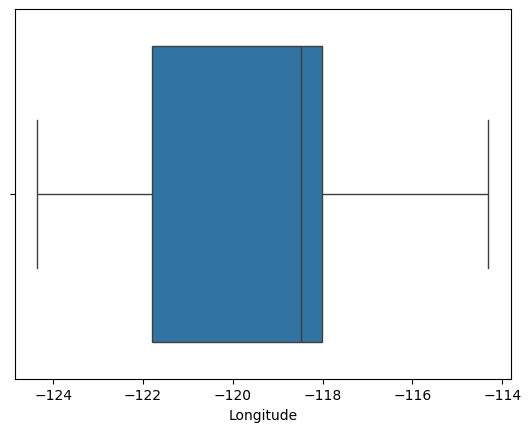

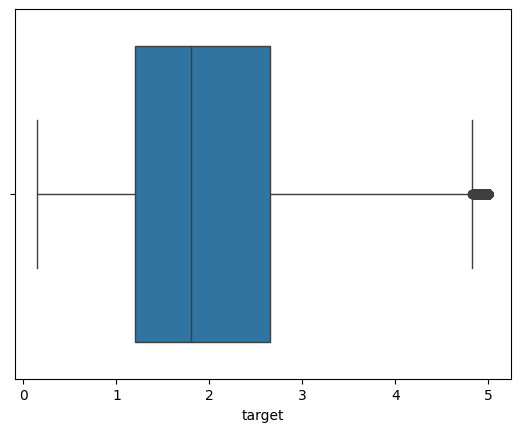

In [23]:
for i in num_columns.columns:
    sns.boxplot(data=dfc,x=i)
    plt.show()

In [24]:
# IQR Method
def outliers(dfc):
    for col in dfc.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = dfc[col].quantile(0.25)
        Q3 = dfc[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)

        # Capping
        dfc[col] = dfc[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return dfc

In [25]:
df1 = outliers(dfc)

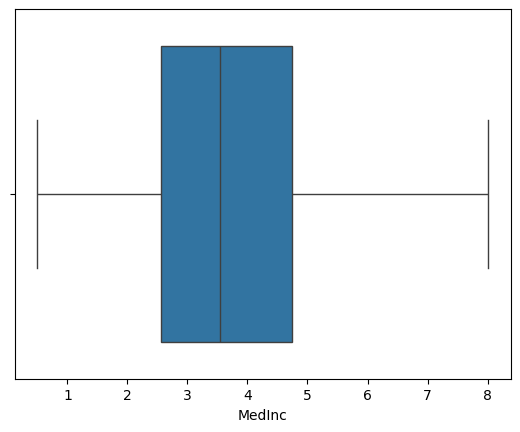

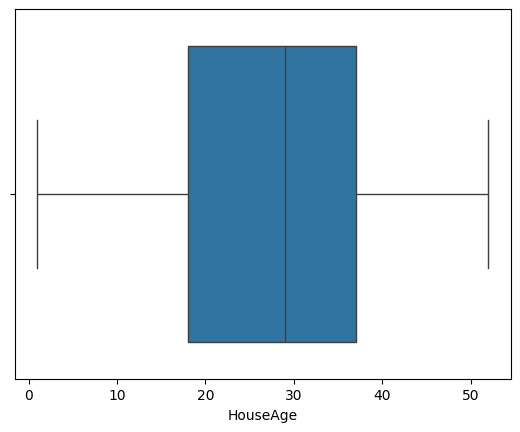

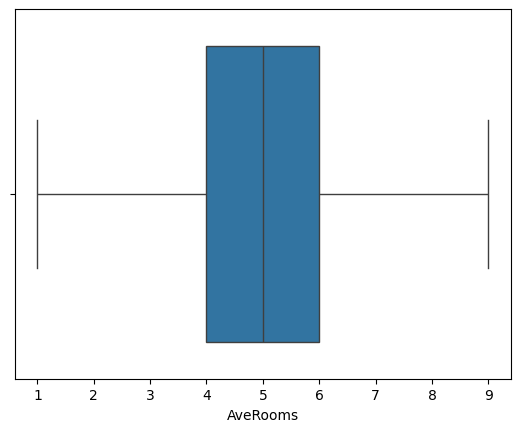

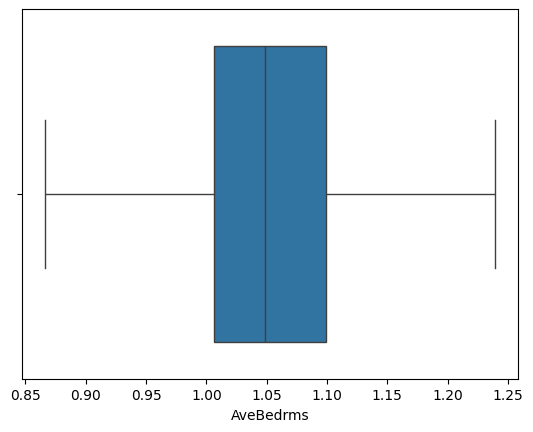

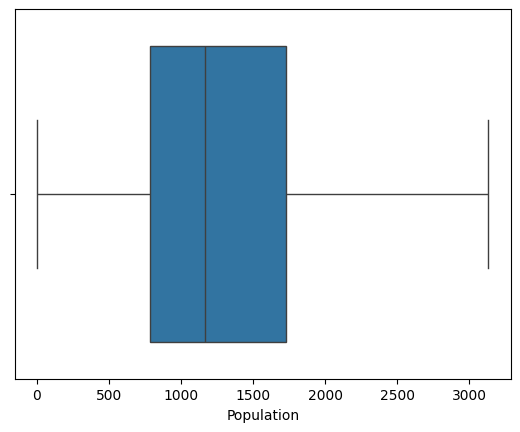

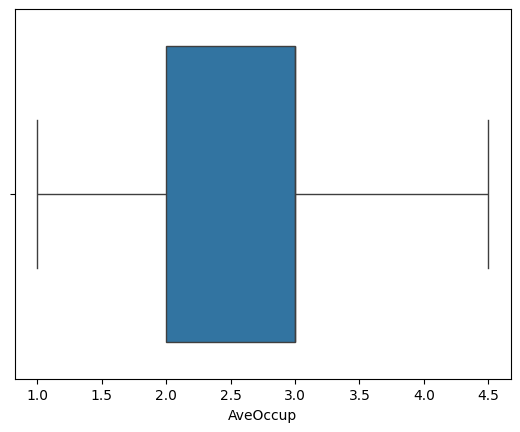

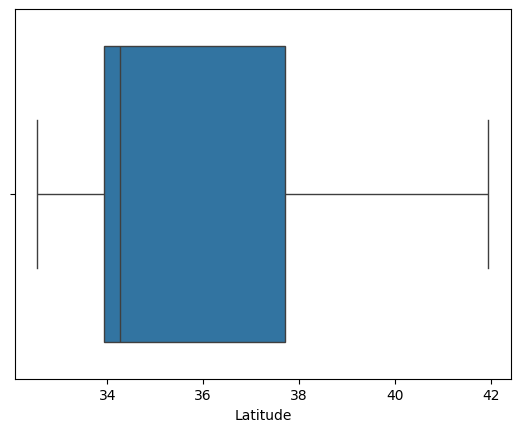

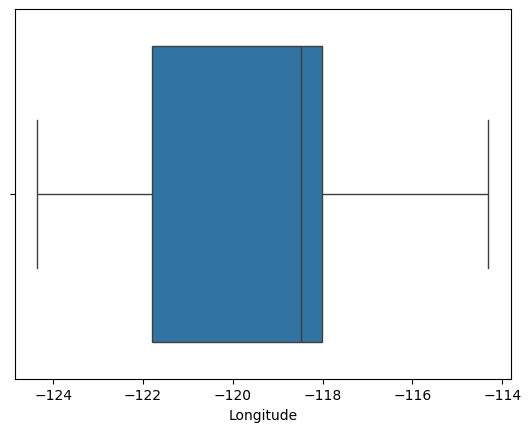

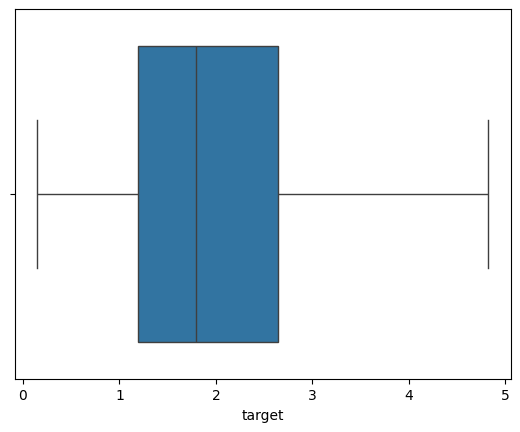

In [26]:
for i in num_columns.columns:
    sns.boxplot(data = df1, x = i)
    plt.show()

In [27]:
# Checking skewness
df1.skew()

,0
MedInc,0.735618
HouseAge,0.060331
AveRooms,0.429236
AveBedrms,0.462645
Population,0.842247
AveOccup,0.226489
Latitude,0.465953
Longitude,-0.297801
target,0.912330


In [28]:
from sklearn.preprocessing import PowerTransformer

In [29]:
pt = PowerTransformer(method = 'yeo-johnson')

In [30]:
numerical_features = df1.select_dtypes(include=['float64', 'int64']).columns

In [31]:
df1[numerical_features] = pt.fit_transform(df1[numerical_features])

In [32]:
df1[numerical_features]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,2.032296,0.975968,1.266038,-0.368541,-1.646905,0.188696,1.089037,-2.414735e-15,1.741431
1,2.032296,-0.568893,0.573148,-1.105422,1.313538,-1.263160,1.082404,-2.414735e-15,1.296102
2,1.768880,1.761010,1.909868,0.269369,-1.213893,0.188696,1.079079,-2.414735e-15,1.261487
3,1.119252,1.761010,0.573148,0.264627,-1.080540,0.188696,1.079079,-2.414735e-15,1.201585
4,0.189397,1.761010,0.573148,0.362216,-1.066009,-1.263160,1.079079,-2.414735e-15,1.206651
...,...,...,...,...,...,...,...,...,...
20635,-1.649221,-0.243556,-0.180473,0.963074,-0.550417,0.188696,1.555813,-1.471046e-15,-1.413673
20636,-0.709009,-0.820372,0.573148,2.021805,-1.553650,0.188696,1.558372,-1.554312e-15,-1.432368
20637,-1.498279,-0.905850,-0.180473,0.816317,-0.294973,-1.263160,1.542961,-1.582068e-15,-1.162276
20638,-1.327106,-0.820372,-0.180473,1.370891,-0.728973,-1.263160,1.542961,-1.665335e-15,-1.293661


In [33]:
df1[numerical_features].skew()

,0
MedInc,-0.002164
HouseAge,-0.113089
AveRooms,0.011794
AveBedrms,-0.003923
Population,0.008781
AveOccup,-0.010867
Latitude,0.153850
Longitude,0.000000
target,0.026767


In [34]:
df2 = df1[numerical_features]

In [35]:
# Finding correlation
corr = df2.corr()

In [36]:
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.149647,0.615095,-0.231318,0.025523,-0.053031,-0.071366,-0.016506,0.682156
HouseAge,-0.149647,1.000000,-0.221032,-0.133337,-0.277908,-0.010649,0.024328,-0.107547,0.077501
AveRooms,0.615095,-0.221032,1.000000,0.159917,-0.100593,-0.012230,0.125014,-0.066386,0.255965
AveBedrms,-0.231318,-0.133337,0.159917,1.000000,0.022477,-0.116204,0.047217,0.015406,-0.120227
Population,0.025523,-0.277908,-0.100593,0.022477,1.000000,0.213964,-0.133011,0.115722,0.011856
AveOccup,-0.053031,-0.010649,-0.012230,-0.116204,0.213964,1.000000,-0.134422,0.153094,-0.238206
Latitude,-0.071366,0.024328,0.125014,0.047217,-0.133011,-0.134422,1.000000,-0.934695,-0.163582
Longitude,-0.016506,-0.107547,-0.066386,0.015406,0.115722,0.153094,-0.934695,1.000000,-0.030294
target,0.682156,0.077501,0.255965,-0.120227,0.011856,-0.238206,-0.163582,-0.030294,1.000000


Text(0.5, 1.0, 'Heatmap representation of correlation of California Housing ')

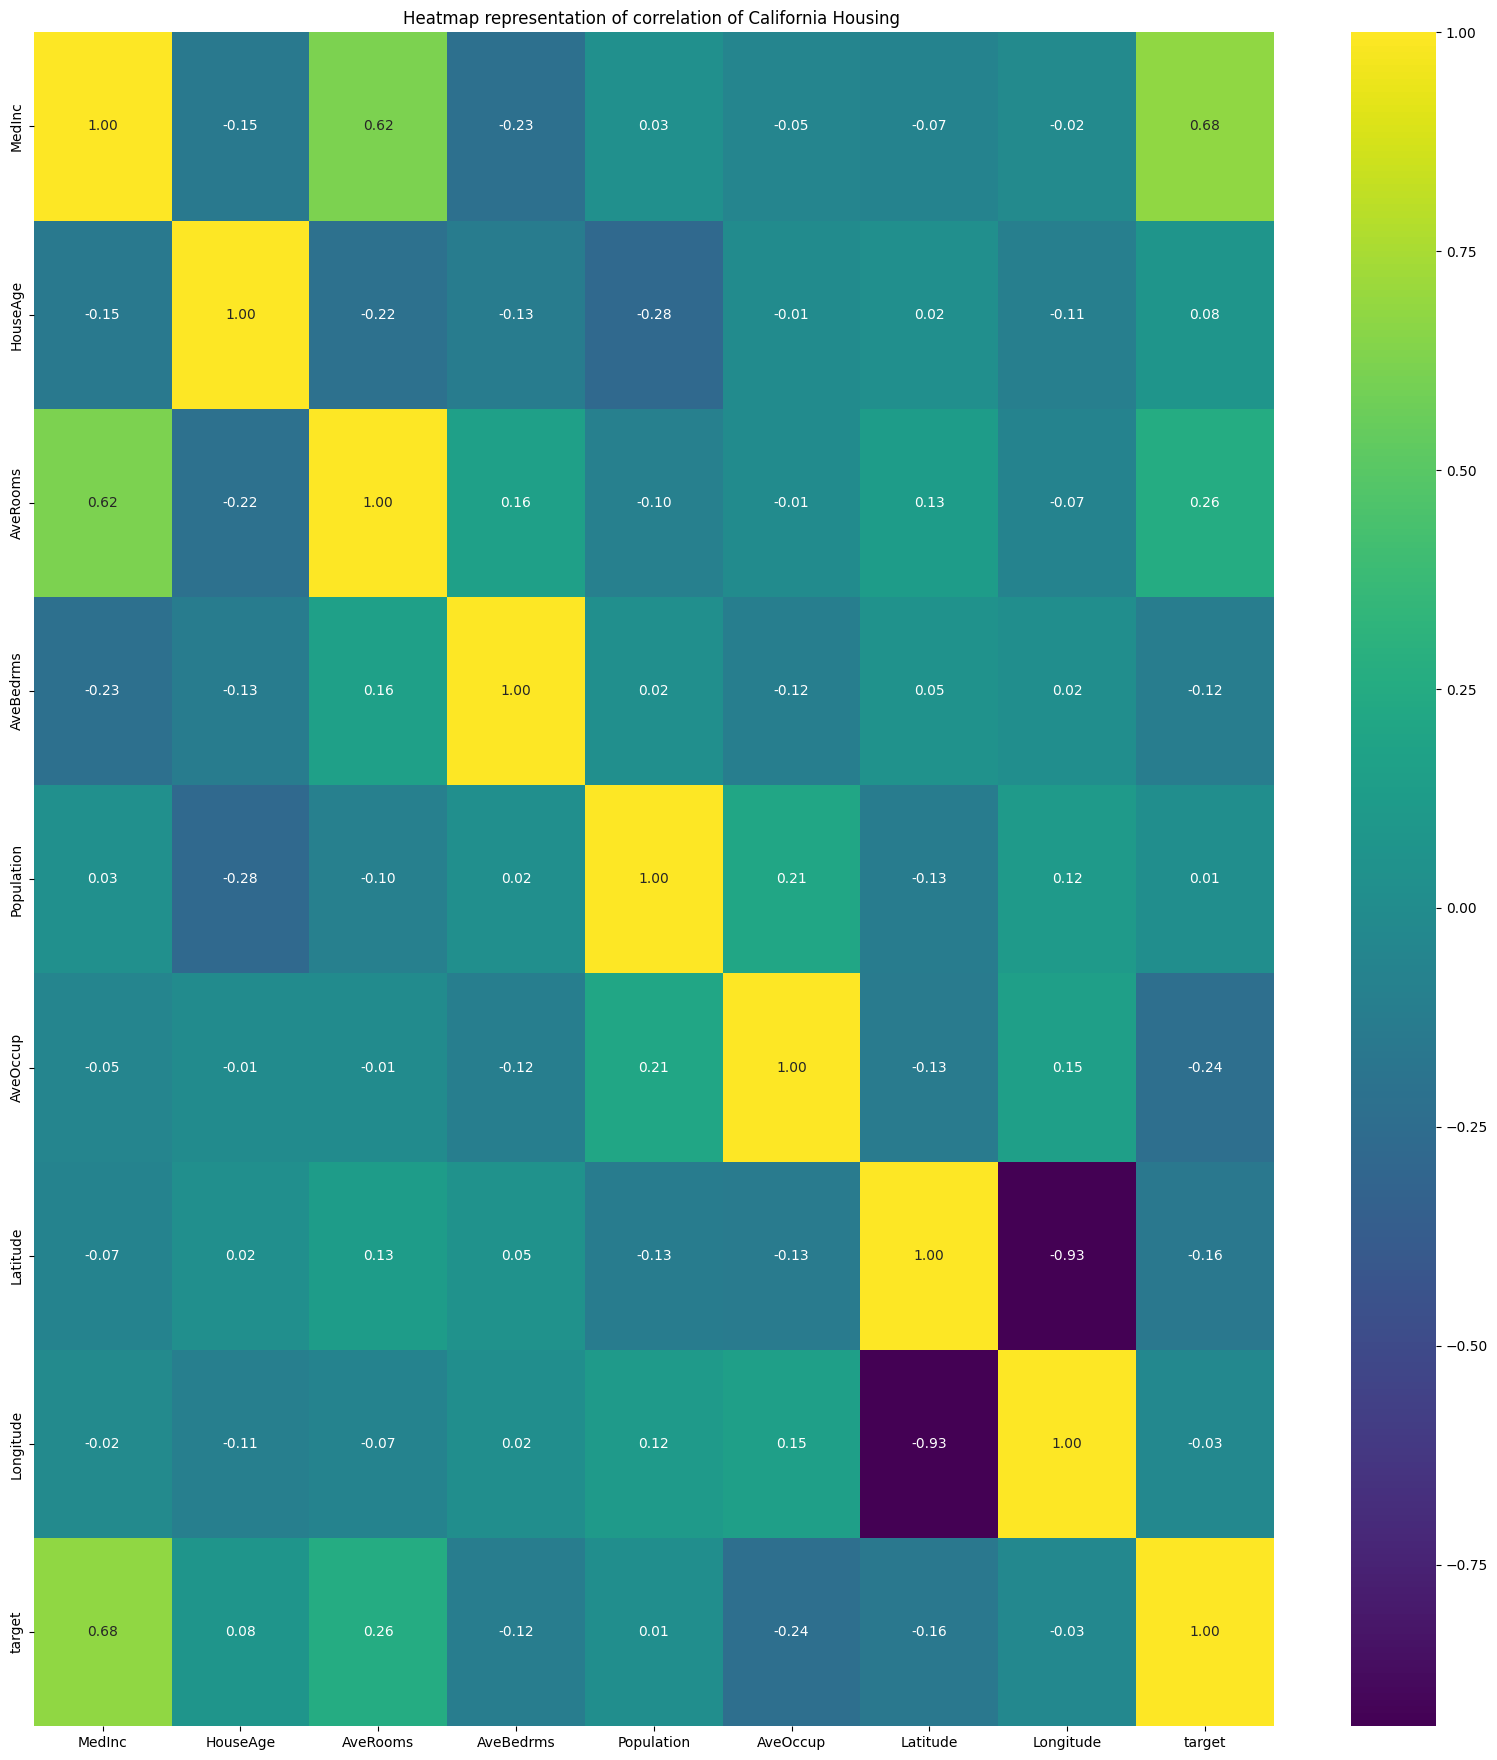

In [37]:
plt.figure(figsize = (20,22))
sns.heatmap(corr , annot = True , fmt = '.2f',cmap = 'viridis')
plt.title('Heatmap representation of correlation of California Housing ')

In [38]:
from sklearn.feature_selection import SelectKBest,f_regression

In [39]:
x = df2.drop('target',axis=1)
y = df2['target']

In [40]:
df2.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,2.032296,0.975968,1.266038,-0.368541,-1.646905,0.188696,1.089037,-2.414735e-15,1.741431
1,2.032296,-0.568893,0.573148,-1.105422,1.313538,-1.263160,1.082404,-2.414735e-15,1.296102
2,1.768880,1.761010,1.909868,0.269369,-1.213893,0.188696,1.079079,-2.414735e-15,1.261487
3,1.119252,1.761010,0.573148,0.264627,-1.080540,0.188696,1.079079,-2.414735e-15,1.201585
4,0.189397,1.761010,0.573148,0.362216,-1.066009,-1.263160,1.079079,-2.414735e-15,1.206651


In [41]:
sk=SelectKBest(score_func=f_regression,k=3)
x_new=sk.fit_transform(x,y)
# Get selected feature names and scores
selected_features = x.columns[sk.get_support()]
feature_scores = pd.DataFrame({'Feature': x.columns, 'Score': sk.scores_}).sort_values(by='Score', ascending=False)

print("Selected Features:", selected_features)
print("\nFeature Scores:")
print(feature_scores)

Selected Features: Index(['MedInc', 'AveRooms', 'AveOccup'], dtype='object')

Feature Scores:
      Feature         Score
0      MedInc  17961.958953
2    AveRooms   1446.967363
5    AveOccup   1241.491796
6    Latitude    567.435834
3   AveBedrms    302.686848
1    HouseAge    124.710759
7   Longitude     18.957391
4  Population      2.901431


In [42]:
x.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [43]:
# Scaling
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 2.0322961 ,  0.97596837,  1.2660383 , ...,  0.18869623,
         1.08903747, -1.30333547],
       [ 2.0322961 , -0.56889299,  0.57314774, ..., -1.26316019,
         1.0824037 , -1.30333547],
       [ 1.76888041,  1.7610103 ,  1.90986781, ...,  0.18869623,
         1.07907857, -1.30333547],
       ...,
       [-1.49827866, -0.90585048, -0.18047285, ..., -1.26316019,
         1.54296058, -0.85459043],
       [-1.32710565, -0.82037197, -0.18047285, ..., -1.26316019,
         1.54296058, -0.89946494],
       [-0.84850039, -0.99224544, -0.18047285, ...,  0.18869623,
         1.52740292, -0.8695486 ]])

In [45]:
# Regression Algorithm implementation
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state = 42)

In [46]:
# Linear Regression
from sklearn.linear_model import LinearRegression

In [47]:
model1 = LinearRegression()

In [48]:
# fitting to linear regression model
model1.fit(x_train,y_train)

LinearRegression()

In [49]:
y_pred1 = model1.predict(x_test)

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [51]:
mae =  mean_absolute_error(y_test,y_pred1)
mse = mean_squared_error(y_test,y_pred1)
rmse = np.sqrt( mean_squared_error(y_test,y_pred1))
r2 = r2_score(y_test,y_pred1)

In [52]:
print (f"MAE : {mae} ")
print (f"MSE : {mse} ")
print (f"RMSE : {rmse} ")
print (f"R2 Score : {r2} ")

MAE : 0.44272827429357287 
MSE : 0.3404415634836796 
RMSE : 0.5834737041921252 
R2 Score : 0.658744182038663 


In [53]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [54]:
model2 = RandomForestRegressor()
model2.fit(x_train,y_train)

RandomForestRegressor()

In [55]:
y_pred2 = model2.predict(x_test)

In [56]:
mae2 =  mean_absolute_error(y_test,y_pred2)
mse2 = mean_squared_error(y_test,y_pred2)
rmse2 = np.sqrt( mean_squared_error(y_test,y_pred2))
r2_2 = r2_score(y_test,y_pred2)

In [57]:
print (f"MAE : {mae2} ")
print (f"MSE : {mse2} ")
print (f"RMSE : {rmse2} ")
print (f"R2 Score : {r2_2} ")

MAE : 0.2806156424658414 
MSE : 0.16412103100464495 
RMSE : 0.4051185394482027 
R2 Score : 0.8354864308957006 


In [58]:
# SVR
from sklearn.svm import SVR

In [59]:
model3=SVR()

In [60]:
model3.fit(x_train,y_train)

SVR()

In [61]:
y_pred3=model3.predict(x_test)

In [62]:
mae=mean_absolute_error(y_test,y_pred3)
mse=mean_squared_error(y_test,y_pred3)
rmse=np.sqrt(mean_squared_error(y_test,y_pred3))
r2=r2_score(y_test,y_pred3)

In [63]:
print(f"mae:{mae}")
print(f"mse:{mse}")
print(f"rmse:{rmse}")
print(f"r2:{r2}")

mae:0.3511704683724916
mse:0.22688156594183184
rmse:0.4763208644829994
r2:0.7725757878281496


In [64]:
# Gradient Boosting Regressor
model4=GradientBoostingRegressor()

In [65]:
model4.fit(x_train,y_train)

GradientBoostingRegressor()

In [66]:
y_pred4=model4.predict(x_test)

In [67]:
mae=mean_absolute_error(y_test,y_pred4)
mse=mean_squared_error(y_test,y_pred4)
rmse=np.sqrt(mean_squared_error(y_test,y_pred4))
r2=r2_score(y_test,y_pred4)

In [68]:
print(f"mae:{mae}")
print(f"mse:{mse}")
print(f"rmse:{rmse}")
print(f"r2:{r2}")

mae:0.3324333781408947
mse:0.20530482246587572
rmse:0.4531057519673258
r2:0.7942041376937861


In [69]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

In [70]:
model5 = DecisionTreeRegressor()

In [71]:
model5.fit(x_train,y_train)

DecisionTreeRegressor()

In [72]:
y_pred5=model5.predict(x_test)

In [73]:
mae=mean_absolute_error(y_test,y_pred5)
mse=mean_squared_error(y_test,y_pred5)
rmse=np.sqrt(mean_squared_error(y_test,y_pred5))
r2=r2_score(y_test,y_pred5)

In [74]:
print(f"mae:{mae}")
print(f"mse:{mse}")
print(f"rmse:{rmse}")
print(f"r2:{r2}")

mae:0.3779090410075545
mse:0.30403283689855587
rmse:0.5513917272670636
r2:0.6952399895558103


In [75]:
# AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

In [76]:
model6 = AdaBoostRegressor()

In [77]:
model6.fit(x_train,y_train)

AdaBoostRegressor()

In [78]:
y_pred6=model6.predict(x_test)

In [79]:
mae=mean_absolute_error(y_test,y_pred6)
mse=mean_squared_error(y_test,y_pred6)
rmse=np.sqrt(mean_squared_error(y_test,y_pred6))
r2=r2_score(y_test,y_pred6)

In [80]:
print(f"mae:{mae}")
print(f"mse:{mse}")
print(f"rmse:{rmse}")
print(f"r2:{r2}")

mae:0.5242501045359287
mse:0.4270589331763888
rmse:0.653497462257038
r2:0.571919644395033


In [81]:
# MLPRegressor
from sklearn.neural_network import MLPRegressor

In [82]:
model7 = MLPRegressor()

In [83]:
model7.fit(x_train,y_train)

MLPRegressor()

In [84]:
y_pred7 = model7.predict(x_test)

In [86]:
mae=mean_absolute_error(y_test,y_pred7)
mse=mean_squared_error(y_test,y_pred7)
rmse=np.sqrt(mean_squared_error(y_test,y_pred7))
r2=r2_score(y_test,y_pred7)

In [87]:
print(f"mae:{mae}")
print(f"mse:{mse}")
print(f"rmse:{rmse}")
print(f"r2:{r2}")

mae:0.3380879067691856
mse:0.2130185679072884
rmse:0.46153934600127905
r2:0.7864719428253972


In [ ]:
# Best model:Random Forest Regressor
# Worst Model:AdaBoost Regressor